# <font color='navy' size=6pt> Association Rules (Data Mining)

In [ ]:
#@title
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120

In [ ]:
!pip install apyori

In [ ]:
!pip install pandas pyfim==6.28

     |████████████████████████████████| 357 kB 7.0 MB/s 
  Created wheel for pyfim: filename=pyfim-6.28-cp37-cp37m-linux_x86_64.whl size=537772 sha256=d71c559d4dcaa35acc4a7cd5ccfabdad1af0d37b535d6e6ba4bea19e51e3f677
  Stored in directory: /root/.cache/pip/wheels/08/9f/26/09cb4efd027e46f96e0a0f33d0a74be614d3caf89c1eeb75a8
Successfully built pyfim


## <font color='blue'> Introduction

### Main Idea: in data mining we want determine the most frequent subsets (itemset) from a large set. 

Example: Imagine we have a set of sets such as, for example: $$\{\{a,b,c\},\{a,b,d,e\},\{a,c,e,f\},\{i,g,k,l\},\{a,b,h,g,n\},\{c,f,i,m\}\}$$

The subsets inside the bigger set can be referred as "transactions" if one imagine different purchases at a store. 

<font color='red'>Question:</font> in the previous example what were the most frequent items purchased?

<font color='green'>Answer:</font> In that example we had a total of 6 transactions among which 4 transactions had the item "a" purchased and also 3 transactions had both items "a" and "b".

**Definition**: An association rule has two parts 

    (i) an antecedent "if" and (ii) a consequent "then". 
    
<font color='green'>An antecedent is an item found within the data; a consequent is an item found in combination with the antecedent.</font>

Thus, association rules can be established by algorithm that can search and count the frequent *if-then* patterns in a database.

<span style="font-family:Calibri; color:blue; font-size:14pt;">Main Goal:</span> apply efficient machine learning algorithms for analyzing associations or co-occurrences in a database.

During this lesson we are going to study and apply two important algorthms: <span style="font-family:Calibri; color:darkred; font-size:12pt;">APRIORI</span> and <span style="font-family:Calibri; color:darkgreen; font-size:12pt;">ECLAT</span>.

## <font color='blue'> The APRIORI Algorithm </font>

Proposed by R. Agrawal and R. Srikant in 1994 for finding frequent itemsets in a dataset for boolean association rule. Name of the algorithm is Apriori because it uses prior knowledge of frequent itemset properties. We apply an iterative approach or level-wise search where k-frequent itemsets are used to find k+1 itemsets.

The idea is to search for frequent *if-then* patterns; the algorithm uses the concepts of **support** and **confidence** in order to identify the most frequent (and thus relevant) relationships.

#### <span style="color:blue">Support:</span> is a measure of how frequently the items appear in the dataset of all transactions.

#### <span style="color:blue">Confidence:</span> represents the number of times the *if-then* statements are found true.

#### <span style="color:blue">Lift:</span> is metric that can help compare the confidence vs. the *expected* confidence. 

#### <span style="color:green;font-size:12pt">Examples:</span>

**Support:** Chance you pick someone that took DATA 310 by random i.e. a probability such 

$$\mathcal{P}(\text{course taken = DATA310})=\frac{\text{The number of students who took DATA 310}}{\text{Total number of students}}$$

**Confidence:** Chance you pick someone that took DATA 310, given they’re in another course. This is a *conditional* probability, i.e. 

$$\mathcal{P}(\text{course taken = DATA310}|\text{course taken = DATA146})$$

**Lift:** Improvement in chance when you contrast support to confidence such as the ratio 

$$\frac{\mathcal{P}(\text{course taken = DATA310}|\text{course taken = DATA146})}{\mathcal{P}(\text{course taken = DATA310})}$$

In summary: 

**confidence**(C1, C2) = (# of students enrolled in course C1 and C2) / (# of students enrolled in C1)

**lift**(C1, C2) = **confidence**(C1, C2) / **support**(C2)

<font color='Red'>APRIORI property: subsets of a frequent itemset must be frequent. If an item is infrequent, all its supersets will be infrequent.</span>

###Example:

<font color='Green'>

| TID |          Items |
|-----|---------------:|
| T1  |     i1, i2, i5 |
| T2  |         i2, i4 |
| T3  |         i2, i3 |
| T4  |     i1, i2, i4 |
| T5  |         i1, i3 |
| T6  |         i2, i3 |
| T7  |         i1, i3 |
| T8  | i1, i2, i3, i5 |
| T9  |     i1, i2, i3 |

So the minimum support count is 2 and the minimum confidence is 60%.

**Step 1**

| Itemset | Support Count |
|--------:|--------------:|
|      i1 |             6 |
|      i2 |             7 |
|      i3 |             6 |
|      i4 |             2 |
|      i5 |             2 |

**Step 2**

| Itemset | Support Count |
|--------:|--------------:|
|  i1, i2 |             4 |
|  i1, i3 |             4 |
|  i1, i4 |             1 |
|  i1, i5 |             2 |
|  i2, i3 |             4 |
|  i2, i4 |             2 |
|  i2, i5 |             2 |
|  i3, i4 |             0 |
|  i3, i5 |             1 |
|  i4, i5 |             0 |

**Step 3**

|    Itemset | Support Count |
|-----------:|--------------:|
| i1, i2, i3 |             2 |
| i1, i2, i5 |             2 |

After this step we stop since the maximum support is 2. For bigger data sets the algorithm may in continue with more steps if in step 3 the max support  is greater than 2.

By using the principle that **Confidence(A->B)=Support_count(A∩B)/Support_count(A)** where **A->B** means **if A then B** we have the follwoing association rules listed in the order of the **Lift**:

   - Confidence\[(i1 and i2)->(i3)\] = Support(i1 and i2 and i3)/Support(i1 and i2) = 2/4 x 100 = 50%
   - Confidence\[(i1 and i3)->(i2)\] = Support(i1 and i2 and i3)/Support(i1 and i3) = 2/4 x 100 = 50%
   - Confidence\[(i2 and i3)->(i1)\] = Support(i1 and i2 and i3)/Support(i2 and i3) = 2/4 x 100 = 50%
   - Confidence\[(i1) -> (i2 and i3)\] = Support(i1 and i2 and i3)/Support(i1) = 2/6 x 100 = 33%
   - Confidence\[(i2) -> (i1 and i3)\] = Support(i1 and i2 and i3)/Support(i2) = 2/7 x 100 = 28%
   - Confidence\[(i3) -> (i1 and i2)\] = Support(i1 and i2 and i3)/Support(i3) = 2/6 x 100 = 33%

Thus, the first three rules can be considered as the most important ones or have some significant relevance in this data set.

Practical Implementation:

     a. Choose a minimum support and confidence: very important for large datasets with many observations. 

     b. Take all possible subsets that meet minimum support.

     c. Calculate all confidence with those subsets; retain those that meet minimum confidence.

     d. Report remaining rules (generally in order with highest lift first).


##  <font color='blue'>The ECLAT Algorithm</font>

**ECLAT** is an acronym for Equivalence class Clustering and bottom-up Lattice Traversal.

<span style="font-family:Calibri; color:blue; font-size:13pt">Main Idea:  use Transaction Id Sets (tidsets) intersections to compute the support value of a candidate.</span>


#### <span style="color:green;font-size:12pt">Example:</span> Case study (movie recommendation engine):

 - Support(M1,M2) = (# of individuals that liked movie M1 and M2)  / (# of individuals)

for example,

 - Support(Star Wars IV,Star Wars V) = 900 / 1000 = 0.9
 - Support(Star Wars IV, Star Wars I) = 100 / 1000 = 0.1


**ECLAT steps:**

    1) Set a minimum joint support.
    2) Take all subsets with a higher support than minimum.
    3) Sort by decreasing support.

#### <span style="color:green;font-size:12pt">Example:</span> Frequently bought items in a grocery store:

| TID | Bread | Butter | Milk | Juice | Jam |
|----:|------:|-------:|-----:|------:|----:|
|  T1 |     1 |      1 |    0 |     0 |   1 |
|  T2 |     0 |      1 |    0 |     1 |   0 |
|  T3 |     0 |      1 |    1 |     0 |   0 |
|  T4 |     1 |      1 |    0 |     1 |   0 |
|  T5 |     1 |      0 |    1 |     0 |   0 |
|  T6 |     0 |      1 |    1 |     0 |   0 |
|  T7 |     1 |      0 |    1 |     0 |   0 |
|  T8 |     1 |      1 |    1 |     0 |   1 |
|  T9 |     1 |      1 |    1 |     0 |   0 |

k = 1 and minimum support = 2

| Item   | TIDSET                       |
|--------|------------------------------|
| Bread  | {T1, T4, T5, T7, T8, T9}     |
| Butter | {T1, T2, T3, T4, T6, T8, T9} |
| Milk   | {T3, T5, T6, T7, T8, T9}     |
| Juice  | {T2, T4}                     |
| Jam    | {T1, T8}                     |

k = 2

|            ITEM | TIDSET           |
|----------------:|------------------|
| {Bread, Butter} | {T1, T4, T8, T9} |
|   {Bread, Milk} | {T5, T7, T8, T9} |
|  {Bread, Juice} | {T4}             |
|    {Bread, Jam} | {T1, T8}         |
|  {Butter, Milk} | {T3, T6, T8, T9} |
| {Butter, Juice} | {T2, T4}         |
|   {Butter, Jam} | {T1, T8}         |
|     {Milk, Jam} | {T8}             |

k = 3

|                  ITEM | TIDSET   |
|----------------------:|----------|
| {Bread, Butter, Milk} | {T8, T9} |
|  {Bread, Butter, Jam} | {T1, T8} |

k = 4 only one transaction: ITEMS:{Bread, Butter, Milk and Jam} TIDSET:{T8}

The minimum support is 2 and we infer the following associations:

|     ITEMS BOUGHT | RECOMMENDED PRODUCTS |
|-----------------:|---------------------:|
|            Bread |               Butter |
|            Bread |                 Milk |
|            Bread |                  Jam |
|           Butter |                 Milk |
|           Butter |                 Coke |
|           Butter |                  Jam |
| Bread and Butter |                 Milk |
| Bread and Butter |                  Jam |


## Example for the APRIORI algorithm in Python with real data

In [ ]:
# this script is assuming that the apyori.py and pyfim.py scripts (along with the data) are uploaded
import pandas as pd
import numpy as np
from apyori import apriori 
from fim import eclat

In [ ]:
order_data = pd.read_csv('drive/MyDrive/Data Sets/order_products_train.csv')
product_data = pd.read_csv('drive/MyDrive/Data Sets/products.csv')

In [ ]:
# inspect the content of order_data
order_data.head(12)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [ ]:
product_data

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [ ]:
named_orders = pd.merge(order_data,product_data,on='product_id')
named_orders.head(12)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16
1,816049,49302,7,1,Bulgarian Yogurt,120,16
2,1242203,49302,1,1,Bulgarian Yogurt,120,16
3,1383349,49302,11,1,Bulgarian Yogurt,120,16
4,1787378,49302,8,0,Bulgarian Yogurt,120,16
5,2445303,49302,2,1,Bulgarian Yogurt,120,16
6,2853065,49302,12,1,Bulgarian Yogurt,120,16
7,3231517,49302,6,1,Bulgarian Yogurt,120,16
8,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16
9,68474,11109,8,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16


In [ ]:
# get the count for the different products purchased
counts = named_orders['product_name'].value_counts()
# the top 20 most purchased products
counts.head(20)

Banana                    18726
Bag of Organic Bananas    15480
Organic Strawberries      10894
Organic Baby Spinach       9784
Large Lemon                8135
Organic Avocado            7409
Organic Hass Avocado       7293
Strawberries               6494
Limes                      6033
Organic Raspberries        5546
Organic Blueberries        4966
Organic Whole Milk         4908
Organic Cucumber           4613
Organic Zucchini           4589
Organic Yellow Onion       4290
Organic Garlic             4158
Seedless Red Grapes        4059
Asparagus                  3868
Organic Grape Tomatoes     3823
Organic Red Onion          3818
Name: product_name, dtype: int64

In [ ]:
v = 500

In [ ]:
# we can apply Otsu's method to threshold the count values
# we need candidate percentiles
t = np.linspace(28,98,num=1000)
cost = []
data = counts

In [ ]:
# now we generate all cost values
for i in t:
  data1 = data[data<np.percentile(data,i)]
  data2 = data[data>=np.percentile(data,i)]
  cost.append(i*np.var(data1)+(100-i)*np.var(data2))

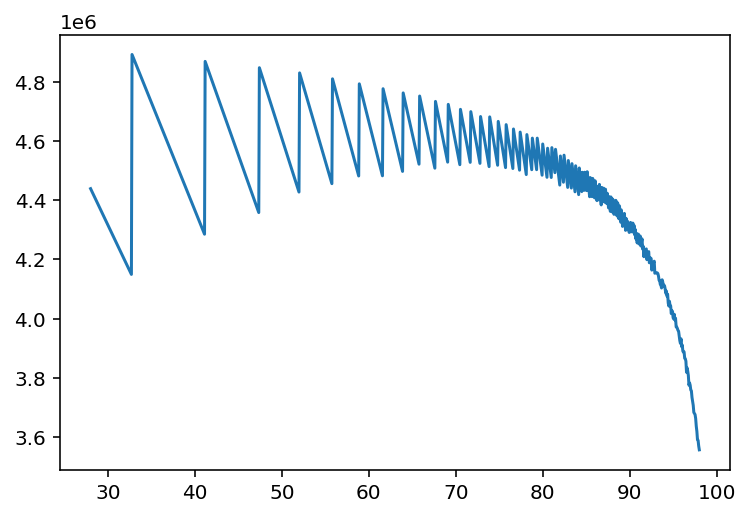

In [ ]:
# plot the cost vs percentiles
plt.plot(t,cost)
plt.show()

In [ ]:
cost= np.asarray(cost)

In [ ]:
idx = ~(np.isnan(cost))

In [ ]:
idx

In [ ]:
cost1 = cost[idx]
t1 = t[idx]

In [ ]:
p = t[np.argmin(cost)]
print('the value for the chosen percentile  is : '+str(p))

the value for the chosen percentile  is : 98.0


In [ ]:
# let's get the minimum for the cost:
v = np.percentile(data,p)
print('the value for thresholding is : '+str(v))

the value for thresholding is : 281.0


In [ ]:
np.exp(v)

9.000000000000002

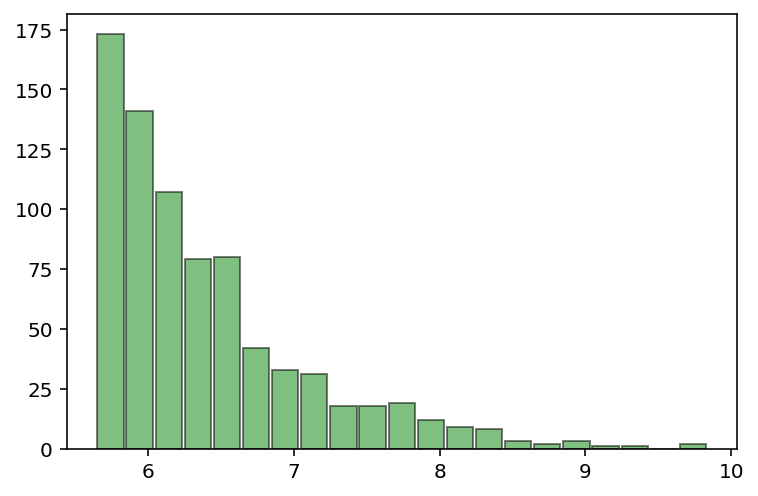

In [ ]:
# we can visualize this the frequency distribution as a histogram and retain a list with the most frequently purchased
counts = counts[counts > v]
plt.hist(np.log(counts.values), bins=21,color='green',edgecolor='k',rwidth=0.9,alpha=0.5)
plt.show()

In [ ]:
selected_orders = named_orders[named_orders['product_name'].isin(counts.index.values.tolist())]
selected_orders

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
152,1,10246,3,0,Organic Celery Hearts,83,4
153,2869,10246,4,1,Organic Celery Hearts,83,4
154,3378,10246,19,0,Organic Celery Hearts,83,4
155,14119,10246,6,0,Organic Celery Hearts,83,4
156,17152,10246,22,1,Organic Celery Hearts,83,4
...,...,...,...,...,...,...,...
1130238,3378984,18382,10,1,Saltine Crackers,78,19
1130239,3387730,18382,53,0,Saltine Crackers,78,19
1130240,3390509,18382,12,1,Saltine Crackers,78,19
1130241,3397058,18382,13,1,Saltine Crackers,78,19


In [ ]:
pd.options.mode.chained_assignment = None
selected_orders['cols'] = selected_orders.groupby('order_id').cumcount()
selected_pivot = selected_orders.pivot(index = 'order_id',columns = 'cols')[['product_name']]

In [ ]:
selected_pivot

product_name  ...     
cols                                              0   ...   43
order_id                                              ...     
1                              Organic Celery Hearts  ...  NaN
36                                      Spring Water  ...  NaN
38        Organic Raw Unfiltered Apple Cider Vinegar  ...  NaN
96                                    Roasted Turkey  ...  NaN
98                            Bag of Organic Bananas  ...  NaN
...                                              ...  ...  ...
3421049                        Organic Baby Broccoli  ...  NaN
3421056                        Sparkling Lemon Water  ...  NaN
3421058                White Giant Paper Towel Rolls  ...  NaN
3421063                          Organic Half & Half  ...  NaN
3421070              Organic Unsweetened Almond Milk  ...  NaN

[118133 rows x 44 columns]

In [ ]:
# now we can get the list of the purchased items for each transaction
purchases = []
for i in range(0,len(selected_pivot)):
    purchases.append([str(selected_pivot.values[i,j]) for j in range(0,25)])

In [ ]:
# ex. purchased items in the ith transaction - only three items: Bananas, Pure Irish Butter and Michigan organic Kale
purchases[123]

In [ ]:
# we create rules for the APRIORI algorithm
rules = apriori(purchases, min_support = .01, min_confidence = 0.1, min_lift=2, max_length=20)

In [ ]:
results = list(rules)

In [ ]:
results[0].ordered_statistics[0].confidence

0.19606637984019668

In [ ]:
rules = 0
for i in range(0,len(results)):
    result = results[i]
    supp   = int(result.support*10000)/100
    conf   = int(result.ordered_statistics[0].confidence*100)
    hypo   = ''.join([x+' ' for x in result.ordered_statistics[0].items_base])
    conc   = ''.join([x+' ' for x in result.ordered_statistics[0].items_add])
    if "nan" not in hypo:
        rules = rules + 1
        print("If "+str(hypo)+" is purchased, " +str(conf)+" % of the time " + str(conc)+" is purchased [support - " +str(supp)+"%]")
print("Total rules built : " +str(rules))

If Organic Cucumber  is purchased, 27 % of the time Bag of Organic Bananas  is purchased [support - 1.07%]
If Honeycrisp Apple  is purchased, 34 % of the time Banana  is purchased [support - 1.04%]
If Organic Fuji Apple  is purchased, 37 % of the time Banana  is purchased [support - 1.02%]
If Large Lemon  is purchased, 19 % of the time Limes  is purchased [support - 1.35%]
If Large Lemon  is purchased, 16 % of the time Organic Avocado  is purchased [support - 1.14%]
If Organic Avocado  is purchased, 18 % of the time Organic Baby Spinach  is purchased [support - 1.18%]
If Organic Baby Spinach  is purchased, 12 % of the time Organic Hass Avocado  is purchased [support - 1.05%]
If Organic Blueberries  is purchased, 25 % of the time Organic Strawberries  is purchased [support - 1.07%]
If Organic Hass Avocado  is purchased, 21 % of the time Organic Strawberries  is purchased [support - 1.3%]
If Organic Raspberries  is purchased, 30 % of the time Organic Strawberries  is purchased [support -

In [ ]:
for item in results:
    pair = item[0]
    # We cannot seem to tell apriori to ignore NaN items, so we will refrain from printing results containing them
    # they will be returned as lower-case text "nan".
    if "nan" not in pair:
        items = [x for x in pair]
        print("Rule: " + items[0] + " -> " + items[1])

        #second index of the inner list
        print("Support: " + str(round(item[1]*100,2)) + "%")

        #third index of the list located at 0th
        #of the third index of the inner list

        print("Confidence: " + str(round( item[2][0][2]*100,2)) + "%")
        print("Lift: " + str( round(item[2][0][3],2) ))

Rule: Organic Cucumber -> Bag of Organic Bananas
Support: 1.07%
Confidence: 27.49%
Lift: 2.1
Rule: Organic Hass Avocado -> Bag of Organic Bananas
Support: 2.05%
Confidence: 15.63%
Lift: 2.53
Rule: Organic Raspberries -> Bag of Organic Bananas
Support: 1.51%
Confidence: 11.5%
Lift: 2.45
Rule: Bag of Organic Bananas -> Organic Strawberries
Support: 2.6%
Confidence: 19.86%
Lift: 2.15
Rule: Banana -> Honeycrisp Apple
Support: 1.04%
Confidence: 34.67%
Lift: 2.19
Rule: Organic Fuji Apple -> Banana
Support: 1.02%
Confidence: 37.13%
Lift: 2.34
Rule: Limes -> Large Lemon
Support: 1.35%
Confidence: 19.61%
Lift: 3.84
Rule: Large Lemon -> Organic Avocado
Support: 1.14%
Confidence: 16.58%
Lift: 2.64
Rule: Organic Baby Spinach -> Organic Avocado
Support: 1.19%
Confidence: 18.92%
Lift: 2.28
Rule: Organic Baby Spinach -> Organic Hass Avocado
Support: 1.06%
Confidence: 12.8%
Lift: 2.07
Rule: Organic Strawberries -> Organic Blueberries
Support: 1.07%
Confidence: 25.55%
Lift: 2.77
Rule: Organic Hass Avoc

## Example for the ECLAT algorithm in Python with real data

In [ ]:
rule_count = 0
rules = eclat(purchases, supp=1, zmin=2)
for i in range(0,len(rules)):
    supp = round(int(rules[i][1])/len(purchases)*100,3)
    items = rules[i][0]
    if "nan" not in items:
        rule_count = rule_count +1
        item_1 = rules[i][0][0]
        item_2 = rules[i][0][1]
        print("If "+str(item_1)+" is purchased, "+str(supp)+"% of the time " + str(item_2)+" is purchased [absolute support=" +str(rules[i][1])+"]")
print("Total rules built : " +str(rule_count))

If Organic Strawberries is purchased, 1.665% of the time Banana is purchased [absolute support=2174]
If Organic Strawberries is purchased, 2.355% of the time Bag of Organic Bananas is purchased [absolute support=3074]
If Organic Baby Spinach is purchased, 1.532% of the time Banana is purchased [absolute support=2000]
If Organic Baby Spinach is purchased, 1.713% of the time Bag of Organic Bananas is purchased [absolute support=2236]
If Organic Baby Spinach is purchased, 1.256% of the time Organic Strawberries is purchased [absolute support=1639]
If Large Lemon is purchased, 1.653% of the time Banana is purchased [absolute support=2158]
If Organic Avocado is purchased, 1.698% of the time Banana is purchased [absolute support=2216]
If Organic Avocado is purchased, 1.074% of the time Organic Baby Spinach is purchased [absolute support=1402]
If Organic Avocado is purchased, 1.033% of the time Large Lemon is purchased [absolute support=1349]
If Organic Hass Avocado is purchased, 1.854% of th

In [ ]:
rules_e = eclat(purchases, supp=1, zmin=2)
eclat_final = [];
for item in rules_e:
    pair = item[0]
    if "nan" not in pair:
        #print(pair)
        eclat_final.append([item[0][0], item[0][1], item[1]])
eclat_final = pd.DataFrame(eclat_final, columns = ['Item1', 'Item2', 'Support'])
eclat_final.sort_values(by=['Support'],ascending=False)

,Item1,Item2,Support
1,Organic Strawberries,Bag of Organic Bananas,3074
9,Organic Hass Avocado,Bag of Organic Bananas,2420
3,Organic Baby Spinach,Bag of Organic Bananas,2236
6,Organic Avocado,Banana,2216
0,Organic Strawberries,Banana,2174
5,Large Lemon,Banana,2158
2,Organic Baby Spinach,Banana,2000
11,Strawberries,Banana,1948
14,Organic Raspberries,Bag of Organic Bananas,1780
15,Organic Raspberries,Organic Strawberries,1670
